<div class="">
<br><br>
<center><br><font size="12"><font face="calibri"><strong>Deep Sparse Rectifier Neural Networks
<center><br><font size="5"><font face="calibri"><strong>Churn Modelling Dataset by KAGGLE
<br><br>
<br><strong>Oleh :
<br>
<br><strong>RAHMAT SYAUQI ISLAMI
<br><strong>09011181722023
<br><br>
<br><strong>Mata Kuliah Kecerdasan Buatan
<br>
<br><strong>Dosen Pengampuh : 
<br><strong>Prof. Dr. Ir. Siti Nurmaini, M.T.
<br><br><br>
<br><strong>Jurusan Sistem Komputer
<br><strong>Fakultas Ilmu Komputer
<br><strong>Universitas Sriwijaya
<br><strong>2019

## Berdasarkan pada jurnal "Deep Sparse Rectifier Neural Networks" dan menggunakan Churn Modelling Dataset by KAGGLE

## IMPORT DATASET

In [1]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.utils import resample
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
scaler = MinMaxScaler
import numpy as np
np.random.seed(7)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from keras.optimizers import Adam
from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix

Using TensorFlow backend.


## IMPORT PACKAGES 
Berikut ini adalah paket-paket yang digunakan antara lain :

Keras Applications adalah salah satu modul dalam pustaka Keras yang menyediakan arsitektur berbagai model Deep Learning ternama. Model-model itu sudah dilatih out of the box. Dengan kata lain, menggunakan Keras Applications sama halnya membuat sistem cerdas.

Paket sklearn.utils

Paket sklearn.preprocessing menyediakan beberapa fungsi utilitas umum dan kelas transformator untuk mengubah vektor fitur mentah menjadi representasi yang lebih sesuai untuk downstream estimator. Dalam hali ini diimportkan StandardScaler dan MinMaxScaler.

NumPy adalah paket dasar untuk komputasi ilmiah dengan Python. NumPy juga dapat digunakan sebagai wadah data generik multidimensi yang efisien. Hal ini memungkinkan NumPy untuk terintegrasi dengan mudah dan cepat dengan berbagai macam database.

Pandas merupakan toolkit yang powerfull sebagai alat analisis data dan struktur untuk bahasa pemrograman Python. 

Seaborn adalah library untuk membuat grafik statistik dengan Python. Ini dibangun di atas matplotlib dan terintegrasi dengan struktur data pandas.

Matplotlib.pyplot berungsi untuk membuat suatu gambar, membuat sebuah plotting area pada gambar, membuat garis pada plotting area, dan-lain-lain.

In [2]:
df = pd.read_csv('Churn_Modelling 1.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


head() berfungsi untuk melihat data sebanyak n pada kolom awal (jika tidak diisi, akan tampil secara random).

In [4]:
enc = LabelEncoder()
df = df.apply(enc.fit_transform)
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,2736,1115,228,0,0,24,2,0,0,1,1,5068,1
1,1,3258,1177,217,2,0,23,1,743,0,0,1,5639,0
2,2,2104,2040,111,0,0,24,8,5793,2,1,0,5707,1
3,3,5435,289,308,0,0,21,1,0,1,0,0,4704,0
4,4,6899,1822,459,2,0,25,2,3696,0,1,1,3925,0


In [5]:
df.CreditScore.value_counts()

459    233
287     63
264     54
314     53
276     53
      ... 
51       1
4        1
14       1
6        1
49       1
Name: CreditScore, Length: 460, dtype: int64

In [6]:
df.Age.value_counts()

19    478
20    477
17    474
18    456
16    447
     ... 
69      2
65      1
64      1
67      1
68      1
Name: Age, Length: 70, dtype: int64

In [7]:
df.shape

(10000, 14)

In [8]:
x = np.array(df.ix[:, :13])
y = np.array(df.ix[:, 13])

C:\Users\HarunPininggit\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
C:\Users\HarunPininggit\Anaconda3\lib\site-packages\pandas\core\indexing.py:822: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  retval = getattr(retval, self.name)._getitem_axis(key, axis=i)
C:\Users\HarunPininggit\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user

In [9]:
df.describe()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,4999.50000,4999.50000,1507.774200,259.584600,0.746300,0.545700,20.920600,5.012800,2036.788100,0.530200,0.70550,0.515100,4998.621200,0.203700
std,2886.89568,2886.89568,846.204311,96.496107,0.827529,0.497932,10.482065,2.892174,2125.232536,0.581654,0.45584,0.499797,2886.711202,0.402769
min,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,2499.75000,2499.75000,773.750000,193.000000,0.000000,0.000000,14.000000,3.000000,0.000000,0.000000,0.00000,0.000000,2498.750000,0.000000
50%,4999.50000,4999.50000,1542.000000,261.000000,0.000000,1.000000,19.000000,5.000000,1383.500000,0.000000,1.00000,1.000000,4998.500000,0.000000
75%,7499.25000,7499.25000,2238.250000,327.000000,1.000000,1.000000,26.000000,7.000000,3882.250000,1.000000,1.00000,1.000000,7498.250000,0.000000
max,9999.00000,9999.00000,2931.000000,459.000000,2.000000,1.000000,69.000000,10.000000,6381.000000,3.000000,1.00000,1.000000,9998.000000,1.000000


In [10]:
IsActiveMember = df[df.Exited==0]
HasCrCard = df[df.Exited==1]

Text(0, 0.5, 'Frequency')

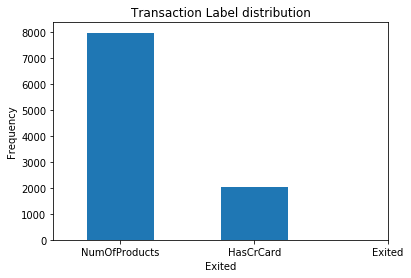

In [11]:
labels = ['NumOfProducts','HasCrCard','Exited']
classes = pd.value_counts(df['Exited'], sort = True)
classes.plot(kind = 'bar', rot=0)
plt.title("Transaction Label distribution")
plt.xticks(range(3), labels)
plt.xlabel("Exited")
plt.ylabel("Frequency")

## HISTOGRAM
Histogram adalah plot yang memungkinkan dapat menemukan dan menunjukkan distribusi frekuensi (bentuk) yang mendasari serangkaian data.

hist() befungsi untuk menemukan dan menunjukan distribusi frekuensi berdasarkan serangkaian data, dan plt.show() berfungsi untuk menampilkannya dalam bentuk grafik.

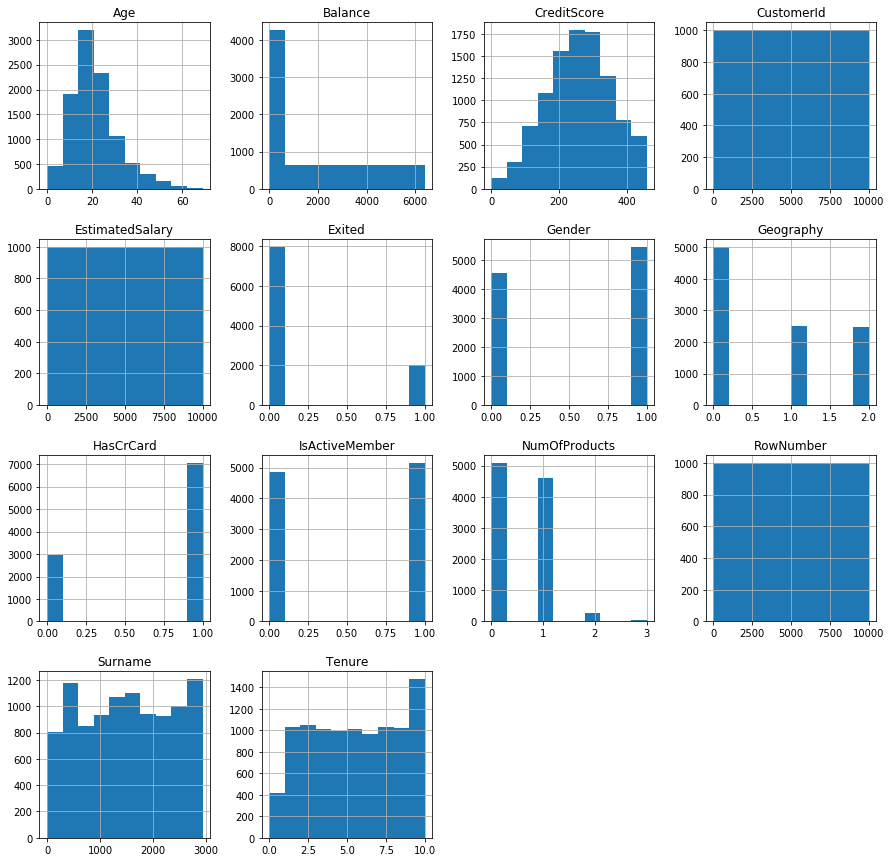

In [12]:
df.hist(figsize=(15,15))
plt.show()

## BOX PLOT
Penyajian grafis lainnya yang bisa merangkum informasi lebih detail mengenai distribusi nilai-nilai data pengamatan adalah Box and Whisker Plots atau lebih sering disebut dengan BoxPlot. Seperti namanya, Box and Whisker, bentuknya terdiri dari Box (kotak) dan Whisker. Boxplot merupakan ringkasan distribusi sampel yang disajikan secara grafis yang bisa menggambarkan bentuk distribusi data (skewness), ukuran tendensi sentral dan ukuran penyebaran (keragaman) data pengamatan. 

RowNumber             AxesSubplot(0.125,0.821923;0.168478x0.0580769)
CustomerId         AxesSubplot(0.327174,0.821923;0.168478x0.0580769)
Surname            AxesSubplot(0.529348,0.821923;0.168478x0.0580769)
CreditScore        AxesSubplot(0.731522,0.821923;0.168478x0.0580769)
Geography             AxesSubplot(0.125,0.752231;0.168478x0.0580769)
Gender             AxesSubplot(0.327174,0.752231;0.168478x0.0580769)
Age                AxesSubplot(0.529348,0.752231;0.168478x0.0580769)
Tenure             AxesSubplot(0.731522,0.752231;0.168478x0.0580769)
Balance               AxesSubplot(0.125,0.682538;0.168478x0.0580769)
NumOfProducts      AxesSubplot(0.327174,0.682538;0.168478x0.0580769)
HasCrCard          AxesSubplot(0.529348,0.682538;0.168478x0.0580769)
IsActiveMember     AxesSubplot(0.731522,0.682538;0.168478x0.0580769)
EstimatedSalary       AxesSubplot(0.125,0.612846;0.168478x0.0580769)
Exited             AxesSubplot(0.327174,0.612846;0.168478x0.0580769)
dtype: object

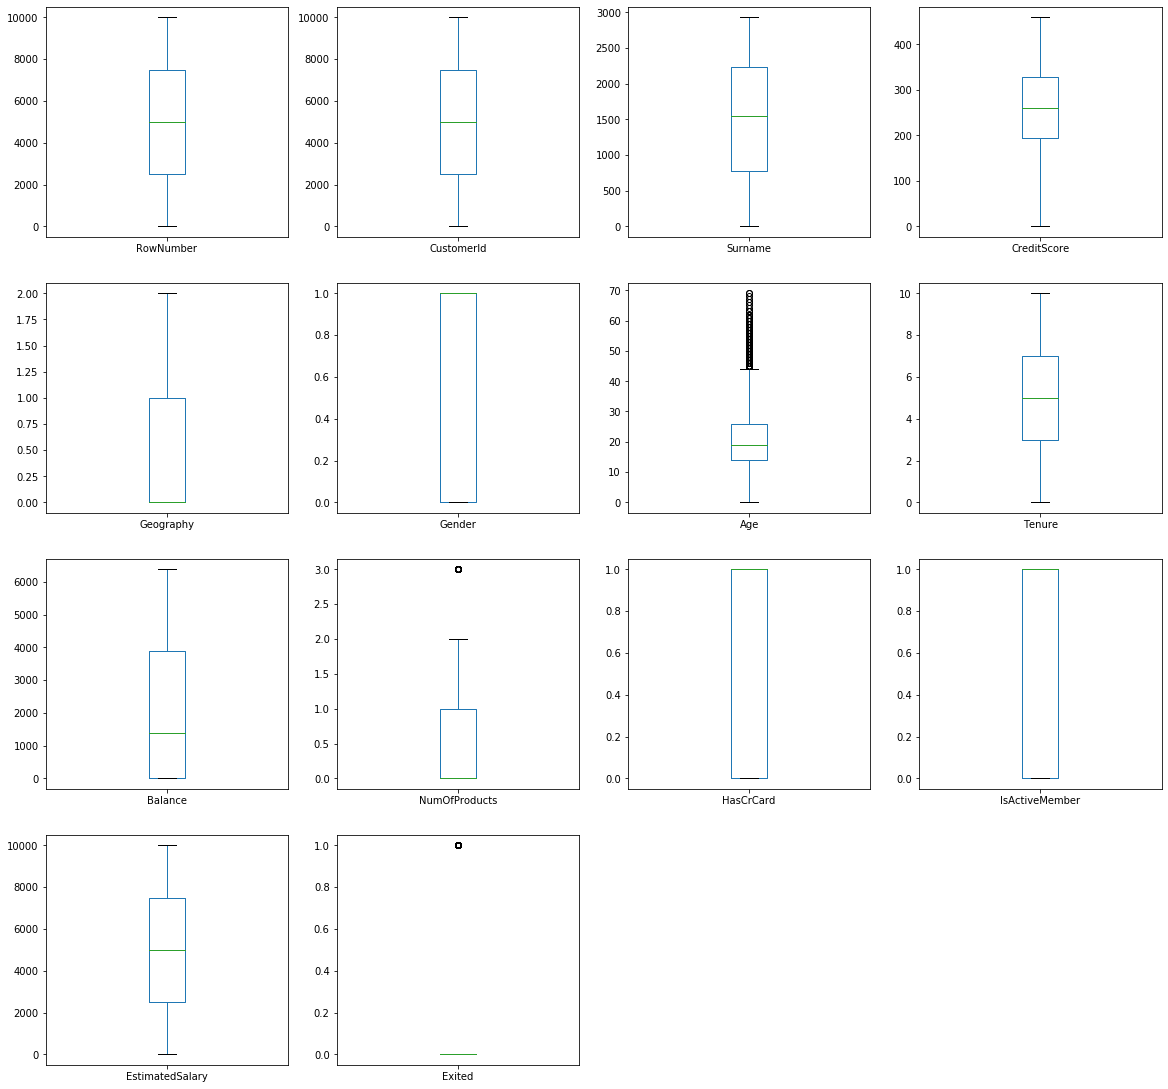

In [13]:
df.plot(kind='box', subplots=True, layout=(11,4), sharex=False, sharey=False, figsize=(20,55))

## FEATURE NORMALIZATION
Normalisasi adalah konsep penting lainnya yang diperlukan untuk mengubah semua fitur ke skala yang sama. Hal ini memungkinkan konvergensi yang lebih cepat pada pembelajaran, dan pengaruh yang lebih seragam untuk semua bobot. Dalam hal ini digunakan MinMaxScaler yang mengubah fitur dengan penskalaan setiap fitur ke rentang yang diberikan (menjadi antara 0 dan 1).

In [14]:
print(y)

[0 0 0 ... 0 1 0]


In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.5, random_state=2)

## SEQUENTIAL MODEL
Model Sekuensial adalah tumpukan lapisan linear. Dalam menentukan bentuk masukan, model perlu tahu bentuk masukan apa yang diharapkan. Lapisan pertama dalam model Sequential (dan hanya yang pertama, karena lapisan berikutnya dapat melakukan inferensi bentuk otomatis) perlu menerima informasi tentang bentuk inputnya. Kemudian untuk menambahkan lapisan cukup dengan menambahkan perintah add.Dalam hal ini, terdapat input layer, hidden layer, dan output layer. Dimana ada yang menggunakan Rectified Linear Unit atau yang dikenal sebagai ReLU, adalah cara paling umum dan dasar untuk memperkenalkan non-linearitas ke dalam jaringan saraf. Fungsi ini hanya max (0, x), dan Sigmoid yang merupakan fungsi aktivasi berkelanjutan dan smooth yang paling umum.

In [17]:
model = Sequential()
model.add(Dense(units= 150, input_dim =5 , activation='relu'))
model.add(Dense(units= 202, activation='relu'))
model.add(Dense(units= 50, activation='relu'))
model.add(Dense(units= 1, activation='sigmoid'))

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 150)               900       
_________________________________________________________________
dense_2 (Dense)              (None, 202)               30502     
_________________________________________________________________
dense_3 (Dense)              (None, 50)                10150     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 51        
Total params: 41,603
Trainable params: 41,603
Non-trainable params: 0
_________________________________________________________________


summary() berfungsi untuk menampilkan ringkasan parameter berdasarkan layer dan output shape.

In [19]:
model.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


compile() berfungsi mengembalikan objek kode Python dari sumber (string normal, string byte, atau objek AST). Dalam hal ini menggunakan optimizer adam dan categorical loss yaitu binary crossentropy.

## ACCURACY 

In [20]:
acc_training = model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=32, 
                         epochs=100)


Train on 5000 samples, validate on 5000 samples
Epoch 1/100
5000/5000 [==============================] - 1s 203us/step - loss: 20.8420 - accuracy: 0.5058 - val_loss: 11.3502 - val_accuracy: 0.5274
Epoch 2/100
5000/5000 [==============================] - 1s 139us/step - loss: 9.7944 - accuracy: 0.5034 - val_loss: 9.5053 - val_accuracy: 0.5392
Epoch 3/100
5000/5000 [==============================] - 1s 166us/step - loss: 7.3738 - accuracy: 0.5040 - val_loss: 5.1252 - val_accuracy: 0.4550
Epoch 4/100
5000/5000 [==============================] - 1s 155us/step - loss: 5.3320 - accuracy: 0.5136 - val_loss: 5.3965 - val_accuracy: 0.5548
Epoch 5/100
5000/5000 [==============================] - 1s 155us/step - loss: 3.7615 - accuracy: 0.5080 - val_loss: 2.8479 - val_accuracy: 0.4986
Epoch 6/100
5000/5000 [==============================] - 1s 152us/step - loss: 2.0461 - accuracy: 0.5200 - val_loss: 2.4765 - val_accuracy: 0.4548
Epoch 7/100
5000/5000 [==============================] - 1s 154us/s

In [21]:
acc_testing  = model.evaluate(x_test, y_test) 
acc_testing

5000/5000 [==============================] - 0s 50us/step


[0.6892182939529419, 0.5519999861717224]

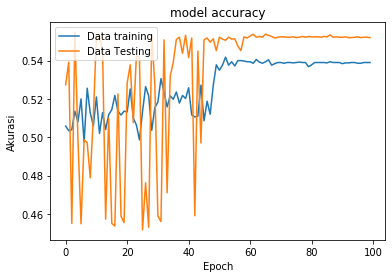

In [22]:
plt.plot(acc_training.history['accuracy'])
plt.plot(acc_training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('Akurasi')
plt.xlabel('Epoch')
plt.legend(['Data training', 'Data Testing'], loc='upper left')
plt.show()

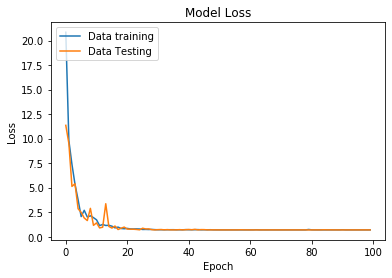

In [23]:
plt.plot(acc_training.history['loss'])
plt.plot(acc_training.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Data training', 'Data Testing'], loc='upper left')
plt.show()

In [29]:
prediction = model.predict_classes(x_test)
cm = confusion_matrix(y_test, prediction)
tp = cm[0,0]
tn = cm[1,1]
fp = cm[0,1]
fn = cm[1,0]

## CONFUSION MATRIX
Confusion matrix merupakan salah satu metode yang dapat digunakan untuk mengukur kinerja suatu metode klasifikasi. Pada dasarnya confusion matrix mengandung informasi yang membandingkan hasil klasifikasi yang dilakukan oleh sistem dengan hasil klasifikasi yang seharusnya.

In [30]:
print ("Confussion matriks:\n",cm)

Confussion matriks:
 [[   0 2237]
 [   3 2760]]


In [31]:
precision = tp / ( tp + fp)
recall = tp/(tp+fn)
f1=(2*precision*recall)/ (precision+recall)
akurasi = (tp+tn)/(tp+tn+fp+fn)
Sensitivity = tp/(tp + fn)

C:\Users\HarunPininggit\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


In [32]:
print ("precesion : ",precision)
print("recall : ",recall)
print ("F1 : ",f1)
print("sensitivity : ",Sensitivity )
print("akurasi : ",akurasi)

precesion :  0.0
recall :  0.0
F1 :  nan
sensitivity :  0.0
akurasi :  0.552


![confusion](confusion.png)
![matriks2](matriks2.png)
dimana:
1. TP adalah True Positive, yaitu jumlah data positif yang terklasifikasi dengan benar oleh sistem.
2. TN adalah True Negative, yaitu jumlah data negatif yang terklasifikasi dengan benar oleh sistem.
3. FN adalah False Negative, yaitu jumlah data negatif namun terklasifikasi salah oleh sistem.
4. FP adalah False Positive, yaitu jumlah data positif namun terklasifikasi salah oleh sistem